# Text Classification - Problem 2 (using word2vec embeddings)

**Submitted by**

D22027 - Maheshkumar N

### Import Required Libraries

In [8]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure
import matplotlib.pyplot as plt

Pickle is a python module used to serialize a python object into a binary format and deserialize it back to the python object

In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [10]:
import nltk
from gensim.models import KeyedVectors

Gensim is a free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possible. Gensim is designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.

In [11]:
#import csv file of twitter data
tweets = pd.read_csv("tweets.csv")

In [12]:
tweets

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8
...,...,...
1176,freak @apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,@APPLE YOU freakING COWS freak YOU,-2.0
1179,@apple I hate you why is my phone not working ...,-2.0


### Text Pre-processing

In [13]:
#1. Converting the text into lower cases
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = tweets.Tweet[i].lower()
#---------------------------------------------------------------------------------------------------

#2. Remove stopwords (and the word "apple")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

#Removing stopwords from all the tweets
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = " ".join([w for w in tweets.Tweet[i].split() if w not in stop_words])
#---------------------------------------------------------------------------------------------------

#3. Remove Punctuations/special symbols and 
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

#Removing punctuation from all the tweets
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = tweets.Tweet[i].translate(remv_punc)
#---------------------------------------------------------------------------------------------------

#4. Remove white spaces
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = tweets.Tweet[i].replace("  ", " ").strip()
#---------------------------------------------------------------------------------------------------

# #5. Stemming
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()
# for i in range(len(df.Reviews)):
#     df.Reviews[i] = " ".join([ps.stem(w) for w in df.Reviews[i].split()])

#---------------------------------------------------------------------------------------------------
#6 Remove the Numbers from the document
from string import digits
# using translate and digits
# to remove numeric digits from string
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = ''.join((w for w in tweets.Tweet[i] if not w.isdigit()))

tweets#Frequency of all averages
pd.crosstab(tweets.Avg,columns="frequency") 

# Subsetting the data where average of tweet = 0
tweets = tweets.loc[tweets.Avg!=0] 
tweets

#Resetting the index of the dataframe and dropping the original index
tweets.reset_index(drop=True,inplace=True)
tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Magesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Avg
0,say apple far best customer care service ever ...,2.0
1,ios fricking smooth beautiful thanxapple apple,2.0
2,love u apple,1.8
3,thank apple loving new iphone s apple iphones ...,1.8
4,apple best customer service new phone min,1.8
...,...,...
839,freak apple,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,apple freaking cows freak,-2.0
842,apple hate phone working im going freak,-2.0


In [14]:
#Frequency of all averages
pd.crosstab(tweets.Avg,columns="frequency") 

col_0,frequency
Avg,
-2.0,17
-1.8,22
-1.6,9
-1.4,23
-1.2,39
-1.0,72
-0.8,76
-0.6,72
-0.4,84


In [15]:
# Subsetting the data where average of tweet = 0
tweets = tweets.loc[tweets.Avg!=0] 
tweets

,Tweet,Avg
0,say apple far best customer care service ever ...,2.0
1,ios fricking smooth beautiful thanxapple apple,2.0
2,love u apple,1.8
3,thank apple loving new iphone s apple iphones ...,1.8
4,apple best customer service new phone min,1.8
...,...,...
839,freak apple,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,apple freaking cows freak,-2.0
842,apple hate phone working im going freak,-2.0


In [16]:
#Resetting the index of the dataframe and dropping the original index
tweets.reset_index(drop=True,inplace=True)
tweets

,Tweet,Avg
0,say apple far best customer care service ever ...,2.0
1,ios fricking smooth beautiful thanxapple apple,2.0
2,love u apple,1.8
3,thank apple loving new iphone s apple iphones ...,1.8
4,apple best customer service new phone min,1.8
...,...,...
839,freak apple,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,apple freaking cows freak,-2.0
842,apple hate phone working im going freak,-2.0


In [17]:
tweets.Tweet.nunique() #duplicates are there in the dataset

828

In [18]:
#tweets.drop_duplicates(['Tweet'])

### 2. Get word embeddings

### 2A. Google's Word2vec model

Details: https://code.google.com/archive/p/word2vec/

The word2vec tool takes a text corpus as input and produces the word vectors as output. It first constructs a vocabulary from the training text data and then learns vector representation of words. The resulting word vector file can be used as features in many natural language processing and machine learning applications.

A simple way to investigate the learned representations is to find the closest words for a user-specified word. The distance tool serves that purpose. For example, if you enter 'france', distance will display the most similar words and their distances to 'france', which should look like:

In [20]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

### 2B. Get word embeddings of the our Words

In [21]:
embeddings

In [22]:
embeddings.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [23]:
len(embeddings.index_to_key)

3000000

In [24]:
# #Word tokenization-- IT IS LIKE USING SPLITTING
# from nltk import word_tokenize
# word_tokenize(tweets.Tweet[22])

In [25]:
# #Word tokenization-- IT IS LIKE USING SPLITTING
# tweet_word_list = []
# for tweet in tweets.Tweet:
#     tweet_word_list.append(word_tokenize(tweet))
# tweet_word_list

In [26]:
# import numpy as np
# tweets_vector1=[1,2,3,4,5]
# a = np.array(tweets_vector1)
# a

In [27]:
# summ = sum(a)
# summ

In [28]:
def vec(a):
    return(embeddings[a])

In [29]:
# Converting each document into a vector
word_embeddings_list = {}
index_list = []
for tweet,index in zip(tweets.Tweet,tweets.index):
    vec_list = []
    for word in tweet.split():
        if word in embeddings.index_to_key:
            index_list.append(index)
            vec_list.append(vec(word))
    word_embeddings_list[tweet] = np.sum(np.array(vec_list),axis=0)
index_set = set(index_list)

In [30]:
# #Use a dictionary to store word embeddings
# word_embeddings_tweet = {}
# for tweet in tweet_word_list:                        # taking each tweet list from all tweets
#     tweets_vector = []                               # empty list to store word vectors to sum it up finally
#     for word in tweet:                               # taking each word from each tweet, to check whether the word is in word embeddings dictionary
#         if word in embeddings.index_to_key:
            
#             tweets_vector.append(embeddings[word])   # appending each vector for coreesonding word to a list
#             #print(tweets_vector)
#     tweets_vector = np.array(tweets_vector)          # converting list to array to perform vector summation
#     vec_add = np.sum(tweets_vector,axis=0)           # axis =0 to sum coressponding elements 
#     #print(vec_add)
#     #print(tweet)
#     word_embeddings_tweet[' '.join((w for w in tweet))] = vec_add #Dict to store tweet as key and aggregated vector as value
# word_embeddings_tweet

In [31]:
# #Use a dictionary to store word embeddings
# word_embeddings_tweet = {}
# index_list=[]

# for tweet in tweet_word_list:                        # taking each tweet list from all tweets
#     tweets_vector = []                               # empty list to store word vectors to sum it up finally
#     for word in tweet:                               # taking each word from each tweet, to check whether the word is in word embeddings dictionary
#         if word in embeddings.index_to_key:
            
#             tweets_vector.append(embeddings[word])   # appending each vector for coreesonding word to a list
#             #print(tweets_vector)
#             ind = tweet_word_list.index(tweet)              # noting the index of the tweets
#             index_list.append(ind)
#     tweets_vector = np.array(tweets_vector)          # converting list to array to perform vector summation
#     vec_add = np.sum(tweets_vector,axis=0)           # axis =0 to sum coressponding elements 
#     #print(vec_add)
#     #print(tweet)
#     word_embeddings_tweet[' '.join((w for w in tweet))] = vec_add #Dict to store tweet as key and aggregated vector as value
# word_embeddings_tweet

In [32]:
# index_list = set(index_list)
# print(index_list)

In [33]:
# len(index_list)

In [34]:
# # Converting into list from set
# index_list =list(index_list)

In [35]:
#Create dataframe such a way that tweets comes in row-wise
df = pd.DataFrame.transpose(pd.DataFrame(word_embeddings_list))

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
say apple far best customer care service ever received apple appstore,-0.622070,-0.415649,0.271973,0.810181,-0.629517,0.539734,1.282471,-0.440430,0.848877,1.488831,...,-0.533234,0.004639,-0.807861,0.247501,0.914551,0.585815,-0.514709,0.202148,0.272095,0.117188
ios fricking smooth beautiful thanxapple apple,0.062561,-0.190430,0.261536,0.094727,-0.633301,0.129150,0.713562,-0.565796,-0.008301,0.851562,...,-0.434448,0.244873,-0.480469,-0.455978,-0.102783,0.152344,-0.688477,-0.358093,-0.062500,0.733154
love u apple,-0.215332,-0.265869,0.177856,0.281494,-0.677734,0.102051,0.383789,-0.724609,-0.320801,0.556152,...,-0.044678,0.286377,-0.226562,-0.751953,-0.080322,-0.418457,-0.280273,-0.232422,-0.197266,0.597168
thank apple loving new iphone s apple iphones pictwittercomxmhjcupcb,-0.933533,-0.842163,-0.171875,1.038086,-1.210815,0.113281,1.189697,-0.984993,-0.335938,0.991821,...,-0.123291,0.511475,-0.813477,-1.147949,0.063477,-0.584473,-1.146111,0.161255,-0.249695,1.328125
apple best customer service new phone min,-0.328125,0.137573,-0.074585,0.017822,-0.199707,-0.068115,-0.122070,-0.387451,0.485840,0.939148,...,0.348236,0.288940,-0.720703,0.174683,0.269775,0.128540,-0.567383,0.644775,-0.355713,0.170898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
freak u apple,-0.113281,-0.120605,0.157532,0.245361,-0.598145,0.363281,0.253906,-0.720703,-0.260742,0.235840,...,0.340820,0.342041,-0.187988,-0.405273,-0.238281,-0.459473,-0.487793,-0.013062,-0.095825,0.451172
cant freaking see pictures tl im annoyed freak twitter apple,0.671478,0.041626,0.253433,1.426270,-1.728760,1.119080,0.678802,-1.502472,0.408936,0.583801,...,0.656738,1.007935,-0.517456,-0.414856,-1.525391,-1.105469,-0.588867,-0.369003,-0.439087,0.372314
apple freaking cows freak,0.522461,-0.177002,-0.010437,0.558105,-0.555176,0.902344,0.471069,-0.476288,-0.072510,0.137207,...,-0.012695,0.289124,-0.070801,-0.056152,-0.106445,-0.091309,-0.508301,0.377563,0.064789,0.283203
apple hate phone working im going freak,0.282898,0.149048,0.298828,0.561279,-0.947388,1.101196,0.441345,-0.918945,0.136230,0.403076,...,-0.281982,0.882568,-0.537354,-0.321594,-0.519287,-0.521484,-0.420410,0.081299,0.198242,0.184814


In [37]:
df=df.reset_index()

In [38]:
df['index']

0      say apple far best customer care service ever ...
1        ios  fricking smooth beautiful thanxapple apple
2                                           love u apple
3      thank apple loving new iphone s apple iphones ...
4              apple best customer service new phone min
                             ...                        
823                                        freak u apple
824    cant freaking see pictures tl im annoyed freak...
825                            apple freaking cows freak
826              apple hate phone working im going freak
827             agounalakis thats nasty apple nasty brat
Name: index, Length: 828, dtype: object

In [39]:
df["Avg"] =np.nan #Creating a new column for Avg rating and filling with null
df

,index,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,Avg
0,say apple far best customer care service ever ...,-0.622070,-0.415649,0.271973,0.810181,-0.629517,0.539734,1.282471,-0.440430,0.848877,...,0.004639,-0.807861,0.247501,0.914551,0.585815,-0.514709,0.202148,0.272095,0.117188,NaN
1,ios fricking smooth beautiful thanxapple apple,0.062561,-0.190430,0.261536,0.094727,-0.633301,0.129150,0.713562,-0.565796,-0.008301,...,0.244873,-0.480469,-0.455978,-0.102783,0.152344,-0.688477,-0.358093,-0.062500,0.733154,NaN
2,love u apple,-0.215332,-0.265869,0.177856,0.281494,-0.677734,0.102051,0.383789,-0.724609,-0.320801,...,0.286377,-0.226562,-0.751953,-0.080322,-0.418457,-0.280273,-0.232422,-0.197266,0.597168,NaN
3,thank apple loving new iphone s apple iphones ...,-0.933533,-0.842163,-0.171875,1.038086,-1.210815,0.113281,1.189697,-0.984993,-0.335938,...,0.511475,-0.813477,-1.147949,0.063477,-0.584473,-1.146111,0.161255,-0.249695,1.328125,NaN
4,apple best customer service new phone min,-0.328125,0.137573,-0.074585,0.017822,-0.199707,-0.068115,-0.122070,-0.387451,0.485840,...,0.288940,-0.720703,0.174683,0.269775,0.128540,-0.567383,0.644775,-0.355713,0.170898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,freak u apple,-0.113281,-0.120605,0.157532,0.245361,-0.598145,0.363281,0.253906,-0.720703,-0.260742,...,0.342041,-0.187988,-0.405273,-0.238281,-0.459473,-0.487793,-0.013062,-0.095825,0.451172,NaN
824,cant freaking see pictures tl im annoyed freak...,0.671478,0.041626,0.253433,1.426270,-1.728760,1.119080,0.678802,-1.502472,0.408936,...,1.007935,-0.517456,-0.414856,-1.525391,-1.105469,-0.588867,-0.369003,-0.439087,0.372314,NaN
825,apple freaking cows freak,0.522461,-0.177002,-0.010437,0.558105,-0.555176,0.902344,0.471069,-0.476288,-0.072510,...,0.289124,-0.070801,-0.056152,-0.106445,-0.091309,-0.508301,0.377563,0.064789,0.283203,NaN
826,apple hate phone working im going freak,0.282898,0.149048,0.298828,0.561279,-0.947388,1.101196,0.441345,-0.918945,0.136230,...,0.882568,-0.537354,-0.321594,-0.519287,-0.521484,-0.420410,0.081299,0.198242,0.184814,NaN


In [40]:
tweets.Avg.isnull().sum()

0

In [41]:
for i in range(len(tweets.Tweet)): #Filling the Avg column with respective Avg rating from original file
    for j in range(len(df['index'])):
        if tweets['Tweet'][i]==df['index'][j]:
            df.iloc[j,301]=tweets['Avg'][j]

In [42]:
df.isnull().sum()

index    0
0        0
1        0
2        0
3        0
        ..
296      0
297      0
298      0
299      0
Avg      0
Length: 302, dtype: int64

In [43]:
# Renaming the columns
df.rename(columns = {'index':'Tweet'}, inplace = True)

In [44]:
df.head()

,Tweet,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,Avg
0,say apple far best customer care service ever ...,-0.622070,-0.415649,0.271973,0.810181,-0.629517,0.539734,1.282471,-0.440430,0.848877,...,0.004639,-0.807861,0.247501,0.914551,0.585815,-0.514709,0.202148,0.272095,0.117188,2.0
1,ios fricking smooth beautiful thanxapple apple,0.062561,-0.190430,0.261536,0.094727,-0.633301,0.129150,0.713562,-0.565796,-0.008301,...,0.244873,-0.480469,-0.455978,-0.102783,0.152344,-0.688477,-0.358093,-0.062500,0.733154,2.0
2,love u apple,-0.215332,-0.265869,0.177856,0.281494,-0.677734,0.102051,0.383789,-0.724609,-0.320801,...,0.286377,-0.226562,-0.751953,-0.080322,-0.418457,-0.280273,-0.232422,-0.197266,0.597168,1.8
3,thank apple loving new iphone s apple iphones ...,-0.933533,-0.842163,-0.171875,1.038086,-1.210815,0.113281,1.189697,-0.984993,-0.335938,...,0.511475,-0.813477,-1.147949,0.063477,-0.584473,-1.146111,0.161255,-0.249695,1.328125,1.8
4,apple best customer service new phone min,-0.328125,0.137573,-0.074585,0.017822,-0.199707,-0.068115,-0.122070,-0.387451,0.485840,...,0.288940,-0.720703,0.174683,0.269775,0.128540,-0.567383,0.644775,-0.355713,0.170898,1.8


# Classification Model

In [45]:
df.shape

(828, 302)

In [46]:
avg=df.Avg[df.Avg!=0]
avg.value_counts()

-0.2    127
 0.2    115
-0.4     84
-0.8     76
-0.6     72
-1.0     72
 0.4     50
 0.6     44
-1.2     39
 0.8     33
 1.0     25
-1.4     23
-1.8     22
 1.2     11
 1.6      9
 1.4      9
-1.6      9
 1.8      5
 2.0      2
-2.0      1
Name: Avg, dtype: int64

In [47]:
avg

0      2.0
1      2.0
2      1.8
3      1.8
4      1.8
      ... 
823   -1.8
824   -1.8
825   -1.8
826   -1.8
827   -2.0
Name: Avg, Length: 828, dtype: float64

# Creating Target Variable y as binary classification

In [48]:
#Creating a target variable
y = avg <= 0
y

0      False
1      False
2      False
3      False
4      False
       ...  
823     True
824     True
825     True
826     True
827     True
Name: Avg, Length: 828, dtype: bool

In [49]:
len(y)

828

In [50]:
df =df.drop(["Tweet"],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Avg
0,-0.622070,-0.415649,0.271973,0.810181,-0.629517,0.539734,1.282471,-0.440430,0.848877,1.488831,...,0.004639,-0.807861,0.247501,0.914551,0.585815,-0.514709,0.202148,0.272095,0.117188,2.0
1,0.062561,-0.190430,0.261536,0.094727,-0.633301,0.129150,0.713562,-0.565796,-0.008301,0.851562,...,0.244873,-0.480469,-0.455978,-0.102783,0.152344,-0.688477,-0.358093,-0.062500,0.733154,2.0
2,-0.215332,-0.265869,0.177856,0.281494,-0.677734,0.102051,0.383789,-0.724609,-0.320801,0.556152,...,0.286377,-0.226562,-0.751953,-0.080322,-0.418457,-0.280273,-0.232422,-0.197266,0.597168,1.8
3,-0.933533,-0.842163,-0.171875,1.038086,-1.210815,0.113281,1.189697,-0.984993,-0.335938,0.991821,...,0.511475,-0.813477,-1.147949,0.063477,-0.584473,-1.146111,0.161255,-0.249695,1.328125,1.8
4,-0.328125,0.137573,-0.074585,0.017822,-0.199707,-0.068115,-0.122070,-0.387451,0.485840,0.939148,...,0.288940,-0.720703,0.174683,0.269775,0.128540,-0.567383,0.644775,-0.355713,0.170898,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,-0.113281,-0.120605,0.157532,0.245361,-0.598145,0.363281,0.253906,-0.720703,-0.260742,0.235840,...,0.342041,-0.187988,-0.405273,-0.238281,-0.459473,-0.487793,-0.013062,-0.095825,0.451172,-1.8
824,0.671478,0.041626,0.253433,1.426270,-1.728760,1.119080,0.678802,-1.502472,0.408936,0.583801,...,1.007935,-0.517456,-0.414856,-1.525391,-1.105469,-0.588867,-0.369003,-0.439087,0.372314,-1.8
825,0.522461,-0.177002,-0.010437,0.558105,-0.555176,0.902344,0.471069,-0.476288,-0.072510,0.137207,...,0.289124,-0.070801,-0.056152,-0.106445,-0.091309,-0.508301,0.377563,0.064789,0.283203,-1.8
826,0.282898,0.149048,0.298828,0.561279,-0.947388,1.101196,0.441345,-0.918945,0.136230,0.403076,...,0.882568,-0.537354,-0.321594,-0.519287,-0.521484,-0.420410,0.081299,0.198242,0.184814,-1.8


In [51]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
Avg    0
Length: 301, dtype: int64

In [52]:
W2V = df.copy()

In [53]:
W2V = W2V.drop(["Avg"],axis=1)

# Train-Validation-Test Split

In [54]:
#For train-test split
from sklearn.model_selection import train_test_split   #import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(W2V, y, test_size = 0.20)  # X-predictors, y-target

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20)

In [55]:
import sklearn.ensemble as ensemble #import ensemble for bagging
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,f1_score #import Scoring metric
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.tree import DecisionTreeClassifier

## Decision Tree Model

In [56]:
#Training the model with best hyperparameters
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

pred = dt.predict(X_valid)
#y_pred #predictions done by decision tree

In [57]:
print("Accuracy_score of Decision Tree:",accuracy_score(y_valid,pred)) # accuracy score of Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred)) # f1 score of Decision tree

Accuracy_score of Decision Tree: 0.5789473684210527
F1_score of Decision Tree: 0.6626506024096386


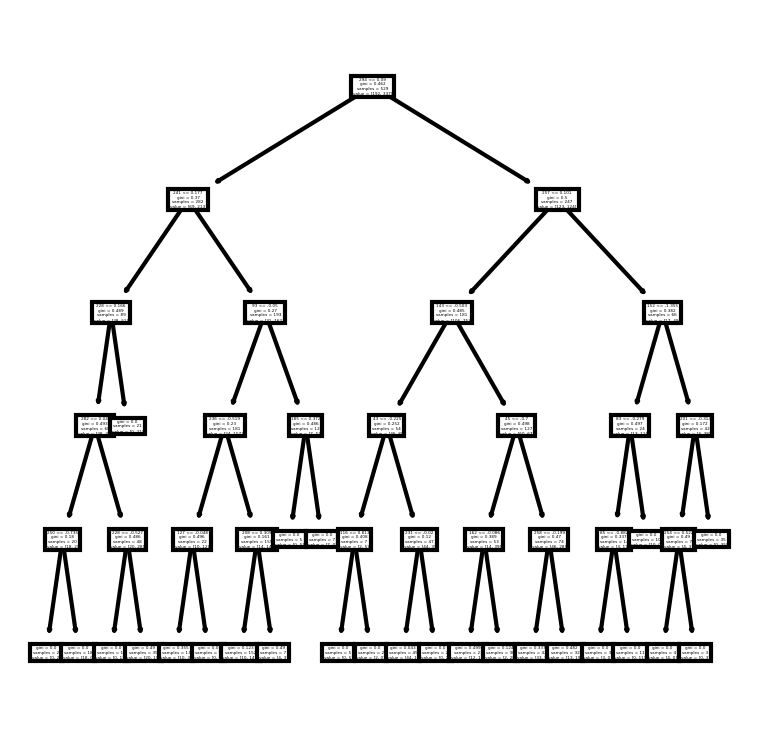

In [58]:
#for plotting a decision tree
from sklearn import tree

fig, axes = plt.subplots(figsize =(3,3), dpi=300)

tree.plot_tree(dt, feature_names = df.columns, filled = False)
plt.show()

## Fully Growned Decision Tree Model

In [209]:
#By default, the Decision Tree function doesn’t perform any pruning and allows the tree to grow as much as it can.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

In [210]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred)
cm

array([[21, 24],
       [40, 48]], dtype=int64)

In [211]:
print("Accuracy_score of fully growned Decision Tree:",accuracy_score(y_valid,pred)) # accuracy score of fully growned Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of fully growned Decision Tree: 0.518796992481203
F1_score of Decision Tree: 0.6


## Pruned Decision Tree Model

In [212]:
#pruning-Finding alpha
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00063012, 0.00110901, 0.00187695, 0.00252048,
       0.00252048, 0.00252048, 0.00252048, 0.00252048, 0.00283554,
       0.0031506 , 0.00324062, 0.00340265, 0.00348989, 0.00354442,
       0.0036757 , 0.00368378, 0.00370103, 0.00432775, 0.00451948,
       0.00453686, 0.00473888, 0.00523484, 0.00544423, 0.00604915,
       0.00622346, 0.00639053, 0.00645243, 0.00661626, 0.00731271,
       0.00785226, 0.0078765 , 0.00882751, 0.00890995, 0.00895056,
       0.00897401, 0.01040714, 0.01128754, 0.01262189, 0.01312749,
       0.01314566, 0.01336618, 0.01359707, 0.01530627, 0.01791525,
       0.02767679])

In [213]:
train_accuracy = {}         #Dictionary to store alpha and mae
validation_accuracy = {}

for i in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    pred_valid = dt.predict(X_valid)
    pred_train = dt.predict(X_train)

    train_accuracy[i] = accuracy_score(y_train,pred_train)
    validation_accuracy[i] = accuracy_score(y_valid,pred_valid)

opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
opt_ccp #optimal CCP_alphas 

0.027676793562421587

In [214]:
prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) #Fitting pruned decision tree model using optimum alpha
prun_dt.fit(X_train,y_train)

pred = prun_dt.predict(X_valid)

In [216]:
print("Accuracy_score of Pruned Decision Tree:",accuracy_score(y_valid,pred)) # accuracy score of fully growned Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Pruned Decision Tree: 0.6616541353383458
F1_score of Decision Tree: 0.7963800904977375


## Bagged Decision Tree Model

In [217]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred_bg = baggedModel.predict(X_valid)

In [218]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_bg)
cm

array([[23, 22],
       [24, 64]], dtype=int64)

In [219]:
print("Accuracy_score of Bagged Decision Tree:",accuracy_score(y_valid,pred_bg)) #accuracy of bagged decision tree model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Bagged Decision Tree: 0.6541353383458647
F1_score of Decision Tree: 0.7963800904977375


## Random Forest Model

In [220]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred_rf= rf.predict(X_valid)

In [221]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_rf)
cm

array([[12, 33],
       [ 4, 84]], dtype=int64)

In [222]:
print("Accuracy_score of Random Forest:",accuracy_score(y_valid,pred_rf)) #accuracy of RandomForest model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Random Forest: 0.7218045112781954
F1_score of Decision Tree: 0.7963800904977375


## Adaboost Model

In [223]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred_ada = ada_boost.predict(X_valid) 

In [224]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_ada)
cm

array([[22, 23],
       [22, 66]], dtype=int64)

In [225]:
print("Accuracy_score of Adaboost:",accuracy_score(y_valid,pred_ada)) #accuracy of adaboost model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Adaboost: 0.6616541353383458
F1_score of Decision Tree: 0.7963800904977375


In [226]:
#print("Recall_score of Adaboost:",recall_score(y_valid,pred_ada))

# Word_to_Vector Results

In [229]:
pd.DataFrame({'Decision tree with depth =5': [0.62,0.69], 'Fully Growned DT': [0.51,0.60], 'Pruned DT': [0.66,0.79], 'Bagged DT': [0.65,0.79], 'Random Forest': [0.72,0.79], 'Adaboost': [0.66,0.79] }, index=['Accuracy','F1_score'])

,Decision tree with depth =5,Fully Growned DT,Pruned DT,Bagged DT,Random Forest,Adaboost
Accuracy,0.62,0.51,0.66,0.65,0.72,0.66
F1_score,0.69,0.60,0.79,0.79,0.79,0.79


--------------------------------------------------------------------------------------------------------------------------------

# 2. TF-IDF Method

### Document-Term Matrix

#### 1. Get the Bag-Of-Words (BOW) Dataframe with TF-IDF vectorizor

In [79]:
tweets

,Tweet,Avg
0,say apple far best customer care service ever ...,2.0
1,ios fricking smooth beautiful thanxapple apple,2.0
2,love u apple,1.8
3,thank apple loving new iphone s apple iphones ...,1.8
4,apple best customer service new phone min,1.8
...,...,...
839,freak apple,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,apple freaking cows freak,-2.0
842,apple hate phone working im going freak,-2.0


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(tweets.Tweet)

names = tfidf_vectorizer.get_feature_names()

tfidf_vectors = tfidf_vectors.toarray()
tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=names)
tfidf_vectors

,aaaaaapple,aapl,abrsm,absolutely,abt,acampan,acceptable,access,accidentally,acciones,...,yh,yikes,yldthng,yo,yooo,you,your,yr,zimmerman,zippos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Dimension Reduction

In [81]:
#using count vectoroizer to create a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(tweets.Tweet).toarray()

In [82]:
#Document-Term Matrix
DTM = pd.DataFrame(X, columns=cv.get_feature_names())

#Remove terms that is conatined in less than 1% of the documents
for col in list(DTM):
    prop = DTM[col].sum()/DTM.shape[0]
    if prop*100 < 1:
        DTM = DTM.drop([col], axis=1)
        
selected_variables = list(DTM)

In [83]:
DTM.shape

(844, 134)

#### 3. Train-Validation-Test Split

In [84]:
#Creating the target variable
y = tweets.Avg <= 0
tfidf_vectors = tfidf_vectors[selected_variables]

#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size = 0.2, stratify=y)

#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, stratify=y_train)

X_valid.head(5)

,already,amazon,android,anyone,app,apple,apples,apps,back,battery,...,way,well,work,would,wow,wtf,yall,year,yet,you
789,0.0,0.0,0.0,0.0,0.0,0.126475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794,0.0,0.0,0.0,0.0,0.0,0.117238,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.117253,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Classification Model

#### 2. Classification Tree

In [85]:
#For fitting regression tree
from sklearn.tree import DecisionTreeClassifier

#For plotting a decision tree
from sklearn import tree

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score #import Scoring metric

import matplotlib.pyplot as plt

In [86]:
#Classification Tree Model Fitting
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

pred = dt.predict(X_valid)

In [108]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred)
cm

array([[12, 49],
       [11, 97]], dtype=int64)

In [109]:
print("Accuracy_score of Decision Tree with Depth=5:",accuracy_score(y_valid,pred)) # accuracy score of Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred)) # f1 score of Decision tree

Accuracy_score of Decision Tree with Depth=5: 0.6449704142011834
F1_score of Decision Tree: 0.7637795275590551


## Fully Growned Decision Tree Model

In [123]:
#By default, the Decision Tree function doesn’t perform any pruning and allows the tree to grow as much as it can.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_valid)

In [124]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred)
cm

array([[27, 34],
       [31, 77]], dtype=int64)

In [125]:
print("Accuracy_score of fully growned Decision Tree:",accuracy_score(y_valid,pred)) # accuracy score of fully growned Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of fully growned Decision Tree: 0.6153846153846154
F1_score of Decision Tree: 0.7031963470319635


## Pruned Decision Tree Model

In [ ]:
#pruning-Finding alpha
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

In [ ]:
train_accuracy = {}         #Dictionary to store alpha and mae
validation_accuracy = {}

for i in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    pred_valid = dt.predict(X_valid)
    pred_train = dt.predict(X_train)

    train_accuracy[i] = accuracy_score(y_train,pred_train)
    validation_accuracy[i] = accuracy_score(y_valid,pred_valid)

opt_ccp = max(validation_accuracy,key = validation_accuracy.get) #Optimum Cost Complexity Parameter
opt_ccp #optimal CCP_alphas 

In [ ]:
prun_dt = DecisionTreeClassifier(ccp_alpha=opt_ccp) #Fitting pruned decision tree model using optimum alpha
prun_dt.fit(X_train,y_train)

pred = prun_dt.predict(X_valid)

In [111]:
print("Accuracy_score of Pruned Decision Tree:",accuracy_score(y_valid,pred)) # accuracy score of fully growned Decision tree
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Pruned Decision Tree: 0.6449704142011834
F1_score of Decision Tree: 0.7637795275590551


## Bagged Decision Tree Model

In [112]:
dt = DecisionTreeClassifier()      #decision tree model as base classifier for bagging -ensemble

baggedModel = ensemble.BaggingClassifier(base_estimator=dt) #bagging with DT models

baggedModel.fit(X_train,y_train) #fitting training data in bagged model
pred_bg = baggedModel.predict(X_valid)

In [113]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_bg)
cm

array([[37, 24],
       [35, 73]], dtype=int64)

In [114]:
print("Accuracy_score of Bagged Decision Tree:",accuracy_score(y_valid,pred_bg)) #accuracy of bagged decision tree model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Bagged Decision Tree: 0.650887573964497
F1_score of Decision Tree: 0.7637795275590551


## Random Forest Model

In [126]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred_rf= rf.predict(X_valid)

In [127]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_rf)
cm

array([[32, 29],
       [29, 79]], dtype=int64)

In [128]:
print("Accuracy_score of Random Forest:",accuracy_score(y_valid,pred_rf)) #accuracy of RandomForest model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Random Forest: 0.6568047337278107
F1_score of Decision Tree: 0.7031963470319635


## Adaboost Model

In [129]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) # fitting training data in adaboost model

pred_ada = ada_boost.predict(X_valid) 

In [130]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_ada)
cm

array([[23, 38],
       [22, 86]], dtype=int64)

In [131]:
print("Accuracy_score of Adaboost:",accuracy_score(y_valid,pred_ada)) #accuracy of adaboost model
print("F1_score of Decision Tree:",f1_score(y_valid,pred))

Accuracy_score of Adaboost: 0.6449704142011834
F1_score of Decision Tree: 0.7031963470319635


In [121]:
#print("Recall_score of Adaboost:",recall_score(y_valid,pred_ada))

# TF-IDF Results

In [132]:
pd.DataFrame({'Decision tree with depth =5': [0.64,0.76], 'Fully Growned DT': [0.61,0.70], 'Pruned DT': [0.64,0.76], 'Bagged DT': [0.65,0.76], 'Random Forest': [0.65,0.70], 'Adaboost': [0.64,0.70] }, index=['Accuracy','F1_score'])

,Decision tree with depth =5,Fully Growned DT,Pruned DT,Bagged DT,Random Forest,Adaboost
Accuracy,0.64,0.61,0.64,0.65,0.65,0.64
F1_score,0.76,0.70,0.76,0.76,0.70,0.70


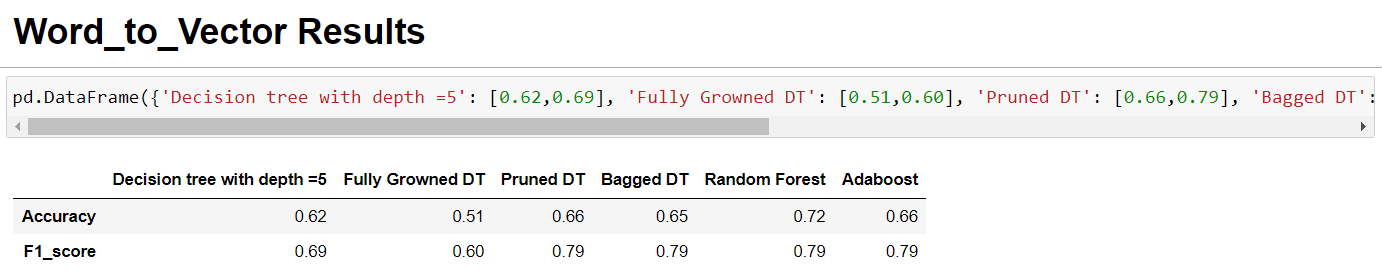

**RESULT:**  

From the above methods, 1) Word_to_vector & 2) TF-IDF: It is found that Word_to_Vector with Random Forest Classifier gives High Accuracy and F1 score when compared to all other Combination

**__Thank You__**